## Order of convergence

Let $p_n \rightarrow p$, with $p_n \neq p$. We say that $p_n$ converges to $p$ or order $\alpha$, with asymptotic rate $\lambda$ is

$$
\lim_{n \rightarrow \infty} \dfrac{|p_{n+1} - p|}{|p_n - p|^\alpha} = \lambda
$$

Special Cases:
1. If $\alpha = 1$, and $\lambda \in (0, 1)$ the convergence is called linear.
1. If $\alpha = 1$, and $\lambda = 1$ the convergence is called sub-linear.
1. If $\alpha = 1$, and $\lambda = 0$ the convergence is called super-linear.
1. If $\alpha = 2$, the convergence is called quadratic.
1. If $\alpha = 3$, the convergence is called cubic.

**Examples**

1. $1/n^k$ converges sub-linearly to $0$.
1. $1/2^n$ converges linearly to $0$.
1. $1/n^n$ converges super-linearly to $0$.
1. $1/2^{2^n}$ converges quadratically to $0$.
1. $1/2^{\alpha^n}$, with $\alpha > 1$ converges at the order of $\alpha$.

It can be shown for $g^{\prime}(p) = 0$, then the convergence of $p_{n+1} = g(p_n)$ is at least quadratic. 

/var/folders/x8/8v73_ng56dgc13wzsjrxtzz00000gs/T/ipykernel_55804/3795024240.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  p[n-1,4] = 1/(2**(3**n))
/var/folders/x8/8v73_ng56dgc13wzsjrxtzz00000gs/T/ipykernel_55804/3795024240.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  p[n-1,3] = 1/(2**(2**n))


,sub_lin,lin,sup_lin,quad,cub
0,1.000000,0.500000,1.000000e+00,2.500000e-01,1.250000e-01
1,0.250000,0.250000,2.500000e-01,6.250000e-02,1.953125e-03
2,0.111111,0.125000,3.703704e-02,3.906250e-03,7.450581e-09
3,0.062500,0.062500,3.906250e-03,1.525879e-05,inf
4,0.040000,0.031250,3.200000e-04,2.328306e-10,inf
5,0.027778,0.015625,2.143347e-05,inf,inf
6,0.020408,0.007812,1.214266e-06,inf,inf
7,0.015625,0.003906,5.960464e-08,inf,inf
8,0.012346,0.001953,2.581175e-09,inf,inf
9,0.010000,0.000977,1.000000e-10,inf,inf


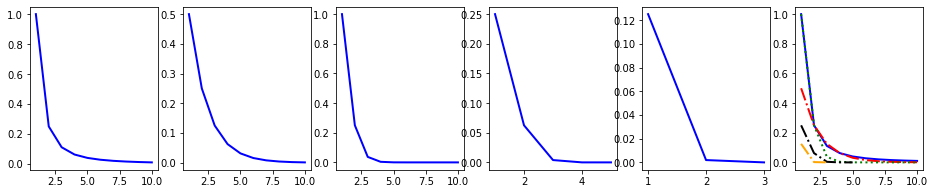

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
p = np.zeros([10,5])

ns = np.arange(1,11)
for n in ns:
    p[n-1,0] = 1/n**2
    p[n-1,1] = 1/2**n
    p[n-1,2] = 1/n**n
    p[n-1,3] = 1/(2**(2**n))
    p[n-1,4] = 1/(2**(3**n))

    
    
fig, axes = plt.subplots(1,6,figsize=(16,3)) 

linestyles = ['-', '-.', ':']
axes[0].plot(ns, p[:,0], color="blue", lw=2, linestyle=linestyles[0])
axes[1].plot(ns, p[:,1], color="blue", lw=2, linestyle=linestyles[0])
axes[2].plot(ns, p[:,2], color="blue", lw=2, linestyle=linestyles[0])
axes[3].plot(ns, p[:,3], color="blue", lw=2, linestyle=linestyles[0])
axes[4].plot(ns, p[:,4], color="blue", lw=2, linestyle=linestyles[0])

axes[5].plot(ns, p[:,0], color="blue", lw=2, linestyle=linestyles[0])
axes[5].plot(ns, p[:,1], color="red",  lw=2, linestyle=linestyles[1])
axes[5].plot(ns, p[:,2], color="green",lw=2, linestyle=linestyles[2])
axes[5].plot(ns, p[:,3], color="black",lw=2, linestyle=linestyles[1])
axes[5].plot(ns, p[:,4], color="orange", lw=2, linestyle=linestyles[1])

pd.DataFrame(p, columns=['sub_lin','lin','sup_lin','quad','cub' ])


In [1]:
import numpy as np
import math
import pandas as pd

## Note that None is pythons Null type.
## The best way to check if a variable is None 
## is to use is.
def g_multiple(x, f, fp, fpp = None):
    if fpp is not None:
        y = x - (f(x) * fp(x)) / ((fp(x) ** 2 - f(x) ** fpp(x)))
    else:
        y = x - f(x) / fp(x)
    return(y)

## Test function h(x) = exp(x) - x - 1
## This function has a double root at x = 0
def h(x):
    y = math.exp(x) - x - 1
    return(y)

def hp(x):
    y = math.exp(x) - 1
    return(y)

def hpp(x):
    y = math.exp(x)
    return(y)

def newtons_method_multiple(p0, e, max_it, g, f, fp, fpp = None):
    p = np.zeros(max_it)
    i = 1
    p[0] = p0
    while i < max_it:
        p[i] = g(p[i-1], f, fp, fpp)
        if abs(p[i] - p[i-1]) <= e:
            return(p[:i])
        i += 1
    return(p)


p0 = 1
e = 0.00001
max_it = 100

p1 = newtons_method_multiple(p0, e, max_it, g_multiple, h, hp)
p2 = newtons_method_multiple(p0, e, max_it, g_multiple, h, hp, hpp)

p2 = np.append(p2, np.nan * np.ones(len(p1) - len(p2)))

d = pd.DataFrame({'iter': np.arange(1, len(p1)+1), 'p1':p1, 'p2':p2})
print(d)

## Try reducing the error rate. What happens? Can this be fixed?

    iter        p1        p2
0      1  1.000000  1.000000
1      2  0.581977  0.515179
2      3  0.319055  0.253109
3      4  0.167996  0.108773
4      5  0.086349  0.036725
5      6  0.043796  0.007690
6      7  0.022058  0.000592
7      8  0.011069  0.000006
8      9  0.005545       NaN
9     10  0.002775       NaN
10    11  0.001388       NaN
11    12  0.000694       NaN
12    13  0.000347       NaN
13    14  0.000174       NaN
14    15  0.000087       NaN
15    16  0.000043       NaN
16    17  0.000022       NaN
17    18  0.000011       NaN
